## PCA and regression error on diamonds data

The Kaggle diamonds data set looks like a good candidate for dimensionality reduction because we know that many of the diamond features are correlated (such as the x,y,z dimensions, and number of carats).

Let's see how many principal components are needed to obtain a high explained variance ratio.  Also, let's see how the number of principal components relates to test error if we use the diamonds data for a regression problem.

### Instructions:
- there are 10 problems for you to solve
- replace YOUR CODE HERE with your own code
- do not make any other changes to the code (although you can put your name beneath the title if you want)

### Submission:
- submit your edited version of this file.  Do not change the file name.

### Grading:
- each problem is worth 10 points
- problems are graded primarily on correctness, but also on whether your code is clear, tidy, and efficient

v1.1

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.random.seed(0)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/grbruns/cst383/master/diamonds.csv')
df.drop(df.columns[0], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# convert categorical variables to numeric
df = pd.get_dummies(df, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Good       53940 non-null  uint8  
 8   cut_Ideal      53940 non-null  uint8  
 9   cut_Premium    53940 non-null  uint8  
 10  cut_Very Good  53940 non-null  uint8  
 11  color_E        53940 non-null  uint8  
 12  color_F        53940 non-null  uint8  
 13  color_G        53940 non-null  uint8  
 14  color_H        53940 non-null  uint8  
 15  color_I        53940 non-null  uint8  
 16  color_J        53940 non-null  uint8  
 17  clarity_IF     53940 non-null  uint8  
 18  clarit

In [ ]:
df.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


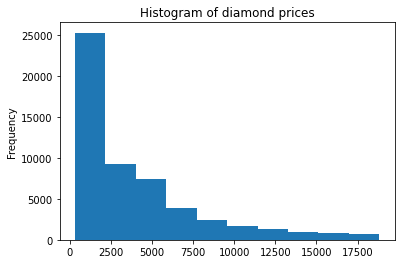

In [ ]:
df['price'].plot.hist()
plt.title('Histogram of diamond prices');

### Preprocess data

In [ ]:
target = 'price'
predictors = list(df.columns)
predictors.remove(target)

X = df[predictors].values
y = df[target].values

print(predictors)
print(X.shape)

['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']
(53940, 23)


### Apply PCA

#### Problem 1

Apply PCA to X.  Compute the cumulative sum of the explained variance ratio for the number of principal components, and assign the result to variable `cumsum`.  Note the 'explained_variance_ratio_' attribute of a PCA object.

In [ ]:
# YOUR CODE HERE

In [ ]:
print(np.round(cumsum, decimals=3))

[0.446 0.688 0.83  0.849 0.867 0.885 0.902 0.917 0.931 0.943 0.955 0.964
 0.972 0.98  0.985 0.99  0.993 0.996 0.997 0.999 0.999 1.    1.   ]


We are interested in the number of components needed to reach a value of explained variance ratio close to one, and also whether there is a clear elbow in the curve.

#### Problem 2

Plot the cumulative explained variance ratio (y axis) as a function of the number of principal components (x axis).

In [ ]:
# YOUR CODE HERE

### Reduce the data as needed to achieve at least 0.95 explained variance ratio

#### Problem 3

Compute NumPy array X_reduced, which is a PCA-reduced version of X with just enough of the principal components used to reach at least 0.95 explained variance ratio.

In [ ]:
# YOUR CODE HERE

In [ ]:
print('Number of principal components needed for 0.95 explained variance ratio: ', X_reduced.shape[1])

### Predict price with linear regression; full data set.

Note: In this notebook we apply PCA then do a test/train split.  In class we discussed that it is better to first do the test train split, then fit the PCA on the training data, then transform the training and test data with the fitted PCA object.

Perform a test/train split on the original data set (before PCA).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Problem 4

Fit a linear regression model on the original training set. Compute RMSE on the original test set, and assign it to variable `rmse`.

In [ ]:
# YOUR CODE HERE

In [ ]:
print('RMSE: {:.1f}'.format(rmse))
print('R squared: {:.3f}'.format(regr.score(X_test, y_test)))

### Predict price with linear regression; reduced data set.

Perform a test/train split on the reduced data set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=0)

#### Problem 5

Fit a linear regression model on the reduced training set. Compute RMSE on the reduced test set, and assign it to variable `rmse`.

In [ ]:
# YOUR CODE HERE

We see a significant increase in error when using the reduced data.

In [ ]:
print('RMSE: {:.1f}'.format(rmse))
print('R squared: {:.3f}'.format(regr.score(X_test, y_test)))

### Plot RMSE as a function of the number of principal components

PCA is an unsupervised learning method: it does not reduce dimensionality in a way that takes into account what we want to do with the data.
Let's see how test error with linear regression changes as a function of the number of principal components that are used.

#### Problem 6

Compute two lists (or arrays):
- **num_components**, which will contain the numbers from 1 to the number of columns in X
- **rmses**, which will contain the cross-validated RMSEs for the corresponding value in num_components.

For example, the first value in num_components will be 1, and the first value in `rmses` will be the CV RMSE for the predictions of linear regression when trained on the first principal component.

I imagine you will write a loop.

DO NOT use PCA to fit or transform **within** the loop -- it does not need to be done in the loop and will slow things down a lot.

In [ ]:
# YOUR CODE HERE

This plot is interesting.  It shows an elbow but at a different number of principal components than in the plot of explained variance ratio.

In [ ]:
plt.plot(num_components, rmses)
plt.title('Test RMSE by number of principal components, linear regression')
plt.xlabel('Number of principal components')
plt.ylabel('RMSE');

### Use a regression tree to predict price.

We just looked at the effect of dimensionality reduction on the performance of linear regression.  Now let's see how dimensionality reduction impacts the performance of a regression tree.

Regression trees have some hyperparameters, but let's start with using default values.  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### Problem 7

Create a regression tree.  Use the default hyperparameters.  Train your regressor, make predictions on the test data, and compute test RMSE as variable rmse.

This is similar to problem 4, but for a regression tree.

In [ ]:
# YOUR CODE HERE

In [ ]:
print('RMSE: {:.1f}'.format(rmse))
print('R squared: {:.3f}'.format(regr.score(X_test, y_test)))

Let's try again, but with a possibly deeper tree.

#### Problem 8

This is the same as the last problem, but use 10 for max depth.

In [ ]:
# YOUR CODE HERE

The result is about the same as before.

In [ ]:
print('RMSE: {:.1f}'.format(rmse))
print('R squared: {:.3f}'.format(regr.score(X_test, y_test)))

#### Problem 9

Do the same thing as in Problem 6, but with a regression tree.  Use the default hyperparameter values.



In [ ]:
# YOUR CODE HERE

In [ ]:
plt.plot(num_components, rmses)
plt.title('Test RMSE by number of principal components, regression tree')
plt.xlabel('Number of principal components')
plt.ylabel('RMSE');

#### Problem 10

For fun, lets look at the diamonds values in 2D using the first two features of the data that was transformed with PCA.

Use the price of the diamond to control the color of each point.

In [ ]:
# YOUR CODE HERE